In [23]:
import os
import glob
import pandas as pd
import AMD_Tools3 as amd
%matplotlib inline

In [16]:
simdata = [pd.read_csv(csvpath) for csvpath in glob.glob('simdata/*.csv')]
simdata = pd.concat(simdata, axis=0)

len(DVI<1.9): 5406
len(simdata): 11803


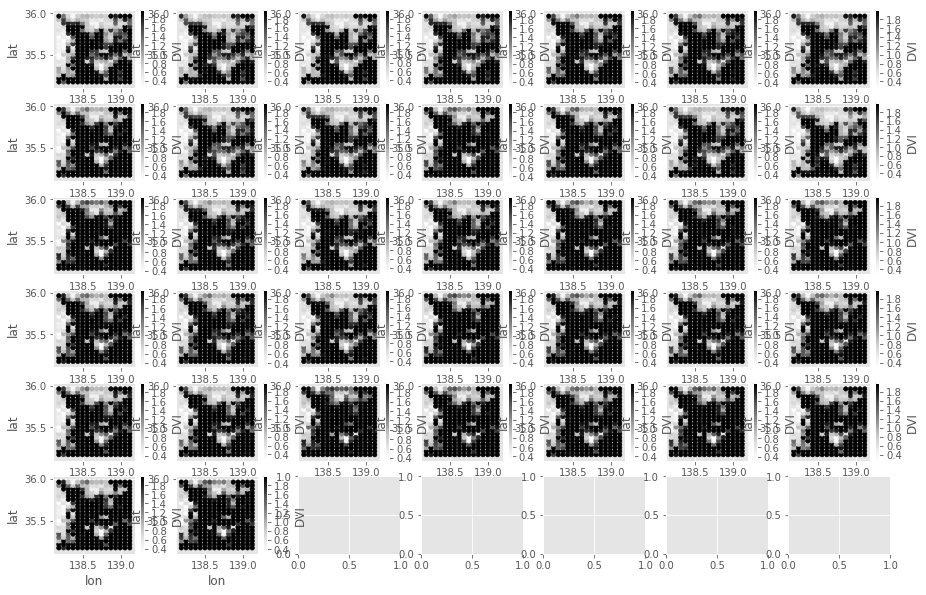

In [65]:
import folium

simdata_grouped = simdata.groupby(by=['meshcode', 'year']).DVI.max()
print('len(DVI<1.9):', (simdata_grouped < 1.9).sum())
print('len(simdata):', len(simdata_grouped))

def meshcode2lat(meshcode):
    latlon = amd.mesh2lalo(meshcode)
    return latlon[0]

def meshcode2lon(meshcode):
    latlon = amd.mesh2lalo(meshcode)
    return latlon[1]

simdata = simdata_grouped.reset_index()
simdata['lat'] = simdata.meshcode.astype(str).apply(meshcode2lat)
simdata['lon'] = simdata.meshcode.astype(str).apply(meshcode2lon)

fig, axes = plt.subplots(6, 7, figsize=(15, 10))
for year, ax in zip(simdata.year.unique(), axes.flatten()):
    #scatter plot
    df = simdata[simdata.year == year].copy()
    df.plot.scatter(x='lon', y='lat', c='DVI', ax=ax)
    
    #scatter map plot
    # map = folium.Map(location=[35.170833333333334, 138.18125], zoom_start=6)
    # for i, row in df.iterrows():
    #     folium.CircleMarker([row['lat'], row['lon']], radius=1,
    #                 popup=str(row['DVI']), fill_color=row['DVI'], fill_opacity=0.5).add_to(map)
    # map
    # map.save(f'output/heatmap_{year}.html')
    # break
    
#show scatter
plt.show()